In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
data = pd.concat([
    pd.read_csv("../../tamaraw.csv"), pd.read_csv("../../results-on-drive/overhead-eval/tamaraw.csv")
], keys=["multi", "single"], names=["connections"])
data

sample  \
connections                                                           
multi       0     results/overhead-eval-mconn/tamaraw/dataset/12...   
            1     results/overhead-eval-mconn/tamaraw/dataset/12...   
            2     results/overhead-eval-mconn/tamaraw/dataset/12...   
            3     results/overhead-eval-mconn/tamaraw/dataset/12...   
            4     results/overhead-eval-mconn/tamaraw/dataset/12...   
...                                                             ...   
single      2495      results/shaping-eval/tamaraw/dataset/0739/2_0   
            2496      results/shaping-eval/tamaraw/dataset/0739/2_0   
            2497      results/shaping-eval/tamaraw/dataset/0739/2_0   
            2498      results/shaping-eval/tamaraw/dataset/0739/2_0   
            2499      results/shaping-eval/tamaraw/dataset/0739/2_0   

                       overhead        setting      value  
connections                                                
multi       0         bandwidth      collected  17.485178  
            1         bandwidth      simulated  19.908837  
            2         bandwidth  simulated-alt  15.727070  
            3           latency      collected   0.732316  
            4           latency      simulated   0.043689  
...                         ...            ...        ...  
single      2495      bandwidth      collected   0.789568  
            2496      bandwidth      simulated   0.409466  
            2497  bandwidth-alt      simulated   0.071194  
            2498        latency      collected  10.309570  
            2499        latency      simulated   8.990314  

[5000 rows x 4 columns]

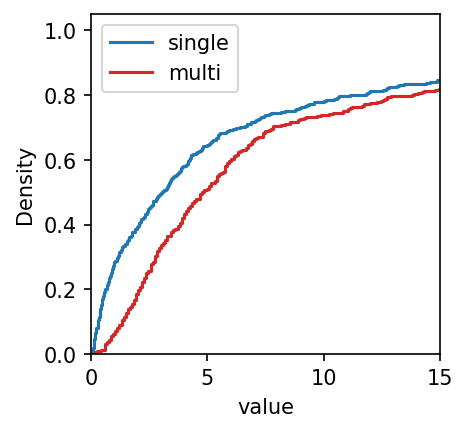

In [60]:
def plot(data, overhead, setting):
    data = data.reset_index()
    data = data.query(f"setting == '{setting}' and overhead == '{overhead}'")
    fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150)
    sns.histplot(data=data.query("connections=='single'"), x="value", cumulative=True, element='step', stat='density', bins=1000, color="tab:blue", label="single", ax=ax, fill=False)
    sns.histplot(data=data.query("connections=='multi'"), x="value", cumulative=True, element='step', stat='density', bins=1000, color="tab:red", label="multi", ax=ax, fill=False)
    ax.set_xlim(0, 15)
    ax.legend()
    
plot(data, "bandwidth", "simulated")
